In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
import random
import pickle
import os.path as osp

import pandas as pd
import seaborn as sns

# TMalign-fast

In [12]:
%%bash
awk 'FNR==NR{id2sid[$1]=$2;next}
     /myduration/{print id2sid[$6],id2sid[$7],$2,$3,$4,$5,$8}' \
       tmp/queryDB.lookup tmp/foldseek_output_fast_dmp029.out > tmp/foldseek_fast_log.txt

In [13]:
%%bash
cat tmp/tmalign_output_fast_dmp029.out | \
    awk '/Name of Chain_1:/{printf "%s ",$4}
         /Name of Chain_2:/{printf "%s ",$4}
         /Length of Chain_1:/{printf "%s ",$4}
         /Length of Chain_2:/{printf "%s ",$4}
         /myduration/{printf "%s ", $2}
         /normalized by length of Chain_1/{printf "%s ",$2}
         /normalized by length of Chain_2/{printf "%s\n",$2}' \
    | awk '{sub(".*/", "", $3); sub(".*/", "", $2); print $2,$3,$4,$5,$6,$7,$1}' \
    > tmp/tmalign_fast_log.txt

In [3]:
df_fs = pd.read_csv('tmp/foldseek_fast_log.txt', delimiter=' ', header=None, names='sid1 sid2 len1 len2 tmscore1 tmscore2 time'.split())

In [4]:
df_ref = pd.read_csv('tmp/tmalign_fast_log.txt', delimiter=' ', header=None, names='sid1 sid2 len1 len2 tmscore1 tmscore2 time'.split())

In [5]:
df_fast = pd.merge(df_fs, df_ref, on=['sid1', 'sid2'])

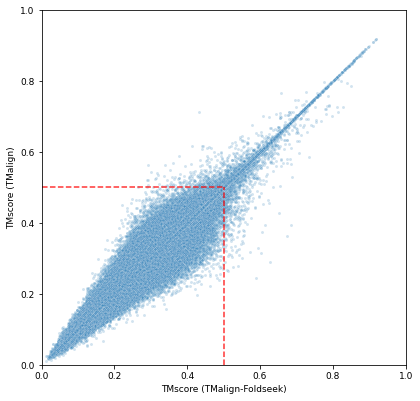

In [6]:
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
plt.rc('axes', labelsize=9)
plt.rc('axes', titlesize=9)
mw = 6.525
plt.figure(figsize=(mw,mw))
sns.scatterplot(data=df_fast, x='tmscore1_x', y='tmscore1_y', marker='.', alpha=0.2, rasterized=True)
plt.ylabel('TMscore (TMalign)')
plt.xlabel('TMscore (TMalign-Foldseek)')
#plt.title('TMscore (1000 sampled SCOPe structures all against all)')
plt.vlines(0.5, 0, 0.5, color='red', linestyles='--', alpha=0.8)
plt.hlines(0.5, 0, 0.5, color='red', linestyles='--', alpha=0.8)
#plt.axis('equal')
plt.ylim([0,1])
plt.xlim([0,1])
plt.savefig('TMalign_TMscore.pdf', dpi=400)
plt.show()

In [7]:
df_fast['time_x'].mean(), df_fast['time_y'].mean(), df_fast['time_y'].mean() / df_fast['time_x'].mean(), df_fast['time_x'].sum() / (60 * 1000), df_fast['time_y'].sum() / (60 * 1000)

(9.049703703703704,
 15.731467467467468,
 1.7383406111991455,
 75.33878333333334,
 130.96446666666668)

In [32]:
sklearn.metrics.r2_score(df_fast['tmscore1_y'], df_fast['tmscore1_x'])  # tmscore1_y is the true score (TMalign)

0.9374786685230418

# TMalign

In [19]:
%%bash
awk 'FNR==NR{id2sid[$1]=$2;next}
     /myduration/{print id2sid[$6],id2sid[$7],$2,$3,$4,$5,$8}' \
       tmp/queryDB.lookup tmp/foldseek_output_notfast_run2.out > tmp/foldseek_log.txt

In [20]:
%%bash
cat tmp/tmalign_output_notfast_run2.out | \
    awk '/Name of Chain_1:/{printf "%s ",$4}
         /Name of Chain_2:/{printf "%s ",$4}
         /Length of Chain_1:/{printf "%s ",$4}
         /Length of Chain_2:/{printf "%s ",$4}
         /myduration/{printf "%s ", $2}
         /normalized by length of Chain_1/{printf "%s ",$2}
         /normalized by length of Chain_2/{printf "%s\n",$2}' \
    | awk '{sub(".*/", "", $3); sub(".*/", "", $2); print $2,$3,$4,$5,$6,$7,$1}' \
    > tmp/tmalign_log.txt

In [13]:
df_fs = pd.read_csv('tmp/foldseek_log.txt', delimiter=' ', header=None, names='sid1 sid2 len1 len2 tmscore1 tmscore2 time'.split())

In [14]:
df_ref = pd.read_csv('tmp/tmalign_log.txt', delimiter=' ', header=None, names='sid1 sid2 len1 len2 tmscore1 tmscore2 time'.split())

In [15]:
df = pd.merge(df_fs, df_ref, on=['sid1', 'sid2'])

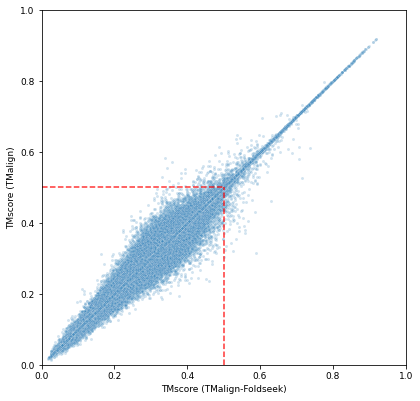

In [16]:
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
plt.rc('axes', labelsize=9)
plt.rc('axes', titlesize=9)
mw = 6.525
plt.figure(figsize=(mw,mw))
sns.scatterplot(data=df, x='tmscore1_x', y='tmscore1_y', marker='.', alpha=0.2, rasterized=True)
plt.ylabel('TMscore (TMalign)')
plt.xlabel('TMscore (TMalign-Foldseek)')
#plt.title('TMscore (1000 sampled SCOPe structures all against all)')
plt.vlines(0.5, 0, 0.5, color='red', linestyles='--', alpha=0.8)
plt.hlines(0.5, 0, 0.5, color='red', linestyles='--', alpha=0.8)
#plt.axis('equal')
plt.ylim([0,1])
plt.xlim([0,1])
plt.savefig('TMalign_TMscore.pdf', dpi=400)
plt.show()

In [63]:
df['time_x'].mean(), df['time_y'].mean(), df['time_y'].mean() / df['time_x'].mean(), df['time_x'].sum() / (60 * 1000), df['time_y'].sum() / (60 * 1000)

(30.378364364364366,
 52.668414414414414,
 1.7337475376454965,
 252.89988333333332,
 438.46455)

In [31]:
sklearn.metrics.r2_score(df['tmscore1_y'], df['tmscore1_x'])

0.9794673882773444

# Combined

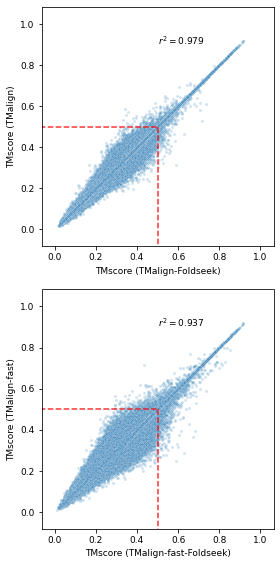

In [47]:
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
plt.rc('axes', labelsize=9)
plt.rc('axes', titlesize=9)
mw = 6.525
mh = 8

plt.figure(figsize=(mh/2,mh))

plt.subplot(211, aspect='equal')
sns.scatterplot(data=df, x='tmscore1_x', y='tmscore1_y', marker='.', alpha=0.2, rasterized=True)
plt.ylabel('TMscore (TMalign)')
plt.xlabel('TMscore (TMalign-Foldseek)')
#plt.title('TMscore (1000 sampled SCOPe structures all against all)')
plt.text(0.5, 0.9, f"$r^2={sklearn.metrics.r2_score(df['tmscore1_y'], df['tmscore1_x']):.3f}$", fontsize=9)
plt.vlines(0.5, -1, 0.5, color='red', linestyles='--', alpha=0.8)
plt.hlines(0.5, -1, 0.5, color='red', linestyles='--', alpha=0.8)
plt.axis('equal')
plt.ylim([0,1])
plt.xlim([0,1])

plt.subplot(212, aspect='equal')
sns.scatterplot(data=df_fast, x='tmscore1_x', y='tmscore1_y', marker='.', alpha=0.2, rasterized=True)
plt.ylabel('TMscore (TMalign-fast)')
plt.xlabel('TMscore (TMalign-fast-Foldseek)')
#plt.title('TMscore (1000 sampled SCOPe structures all against all)')
plt.text(0.5, 0.9, f"$r^2={sklearn.metrics.r2_score(df_fast['tmscore1_y'], df_fast['tmscore1_x']):.3f}$", fontsize=9)
plt.vlines(0.5, -1, 0.5, color='red', linestyles='--', alpha=0.8)
plt.hlines(0.5, -1, 0.5, color='red', linestyles='--', alpha=0.8)
plt.axis('equal')
plt.ylim([0,1])
plt.xlim([0,1])

plt.tight_layout()
plt.savefig('Suppl_TMalign_vs_TMalignFoldseek.pdf', dpi=400)
plt.show()